# Лабораторная работа №1
по Машинному обучению
выполнил: Грибанов Е.О., САПР-1.2

Для данной лабораторной работы я выбрал сет данных пассажиров Титаника с сайта Kaggle.com
Данный датасет состоит из трёх частей:
1. Тренировочная часть;
2. Тестовая часть;
3. Файла, в виде которого нужно сдавать ответ.

Поскольку в данный момент нас интересует лишь тренировочный файл, то я буду работать с ним.
Целевой признак - выжил человек или нет - Survived.

## Изучение основных характеристик набора данных

In [4]:
import pandas as pd

# В первую очередь, нужно считать сами данные из файла
_csv = pd.read_csv("./data/train.csv")

# Выводим количество элементов
print(_csv.size)

10692


In [5]:
# Выводим список колонок с типами данных
print(_csv.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [6]:
from functools import reduce

# Количество пустых значений
sum = 0
for i in pd.isnull(_csv.values):
    sum += reduce(lambda prev, curr: prev + 1 if curr else prev + 0, i, 0)

sum

866

In [9]:
# Основные статистические характеристики
_csv.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# Эмпирическое среднее и дисперсия целевого значения
print(f"{_csv['Survived'].mean()}\t{_csv['Survived'].std()}")

0.3838383838383838	0.4865924542648575


## Визуальное исследование датасета

c:\Users\EvgenyGribanov\Desktop\ML Lab1\.env\lib\site-packages\plotnine\geoms\geom_path.py:75: PlotnineWarning: geom_path: Removed 177 rows containing missing values.


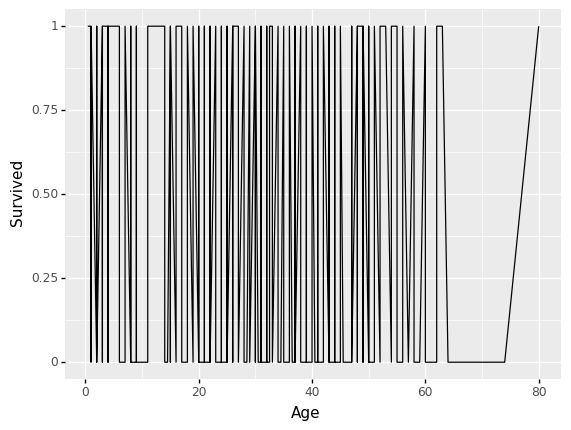

<ggplot: (201910545598)>

In [15]:
from plotnine import ggplot, aes, geom_line

# Количество выживших по возрастным группам
# ggplot(_csv) + aes(x="Age", y="Survived") + geom_line()